In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df= pd.read_csv("loan_data.csv")

In [3]:
df.head(3)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1


In [4]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [5]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


There are no null values


In [6]:
df.duplicated().sum()

np.int64(0)

There are no duplicate values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [8]:
# Change the datatype to INTERGER

# Fill missing values in person_age with the median and then convert to int
df["person_age"] = df["person_age"].fillna(df["person_age"].median()).astype(int)
df["loan_status"] = df["loan_status"].fillna(df["loan_status"].median()).astype(int)
df["credit_score"] = df["credit_score"].fillna(df["credit_score"].median()).astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

### **EDA**

In [9]:
df['person_age'].describe()

,person_age
count,45000.000000
mean,27.764178
std,6.045108
min,20.000000
25%,24.000000
50%,26.000000
75%,30.000000
max,144.000000


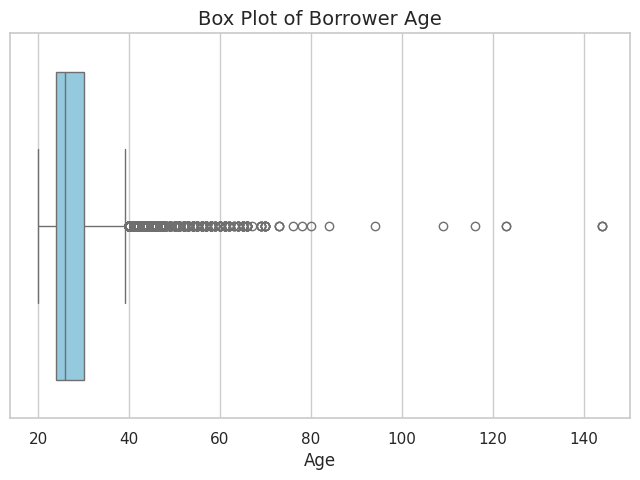

In [10]:
# Set plot style
sns.set(style="whitegrid")

# Create the box plot for person_age
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["person_age"], color="skyblue")

# Add title and labels
plt.title("Box Plot of Borrower Age", fontsize=14)
plt.xlabel("Age", fontsize=12)

# Show the plot
plt.show()

From the statistical summary and box plot of the age column, it shows that most of the borrowers are within the ages of 20 to 30. there are several outliers like age 144. The boxplot reveals ages ranging from 80 to 144.

Banks and financial institutions rarely loan to customer within such age. So we will remove those customers

In [11]:
# Remove age outliers: Keep ages between 20 and 75
df = df[(df["person_age"] >= 20) & (df["person_age"] <= 75)]

# Confirm removal
print(df["person_age"].describe())


count    44988.000000
mean        27.742354
std          5.881527
min         20.000000
25%         24.000000
50%         26.000000
75%         30.000000
max         73.000000
Name: person_age, dtype: float64


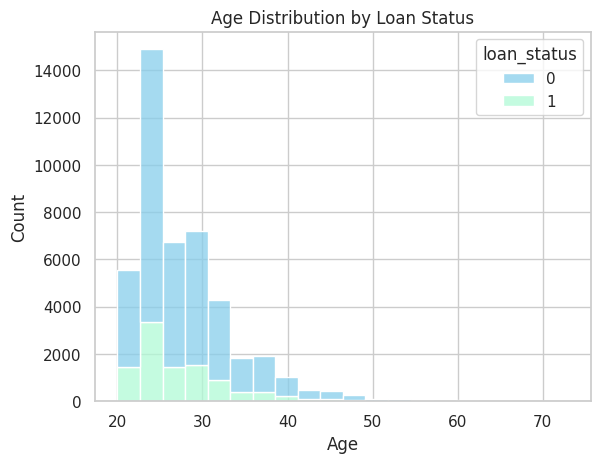

In [12]:
sns.histplot(data=df, x='person_age', hue='loan_status', multiple='stack', bins=20 , palette= ('skyblue', '#B1FAD6', '#E8E3FF', '#FFCC99'))
plt.title('Age Distribution by Loan Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Young borrowers dominate the dataset, especially ages 22 to 30, with a clear peak around age 25. Most defaults occur among younger individuals, but the number of non-defaults in that group is still much higher


#### **Gender**

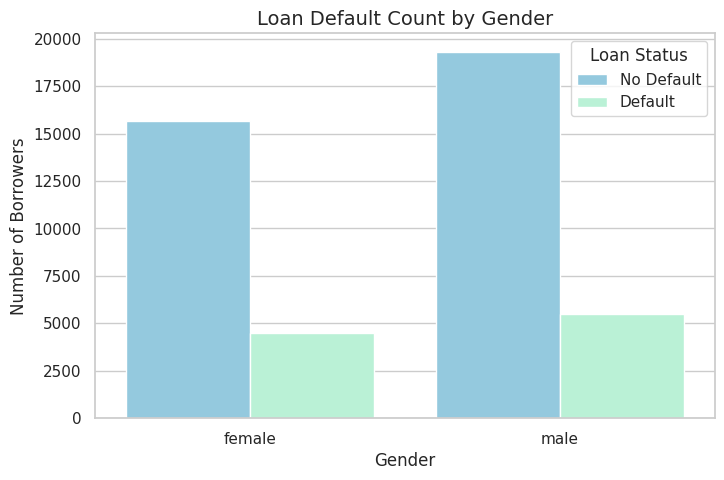

In [13]:

sns.set(style="whitegrid")

# Create the count plot for gender vs loan status
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="person_gender", hue="loan_status", palette=('skyblue', '#B1FAD6', '#E8E3FF', '#FFCC99'))

# Add titles and labels
plt.title("Loan Default Count by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Number of Borrowers", fontsize=12)
plt.legend(title="Loan Status", labels=["No Default", "Default"])

# Display the plot
plt.show()


#### **Education**

In [14]:
df['person_education'].value_counts()

,count
person_education,
Bachelor,13395
Associate,12025
High School,11967
Master,6980
Doctorate,621


In [15]:
## Getting the number and percentage of the customers' education

# Get value counts and percentage for person_education
edu_counts = df["person_education"].value_counts()
edu_percent = df["person_education"].value_counts(normalize=True) * 100

# Combine into a single DataFrame for clarity
education_summary = pd.DataFrame({
    "Count": edu_counts,
    "Percentage": edu_percent.round(2)
})

# Display the result
print(education_summary)

                  Count  Percentage
person_education                   
Bachelor          13395       29.77
Associate         12025       26.73
High School       11967       26.60
Master             6980       15.52
Doctorate           621        1.38


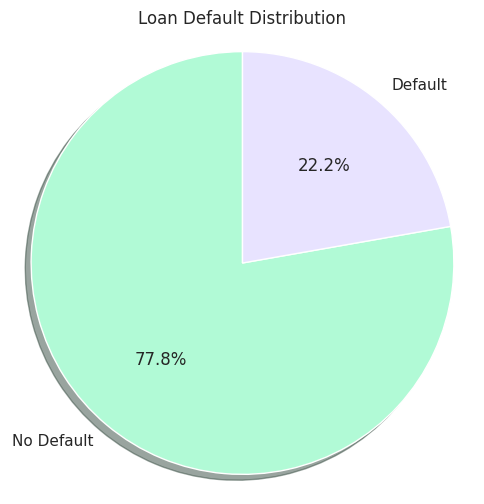

In [16]:
# Plot pie chart

status_counts = df["loan_status"].value_counts()

# Labels and colors
labels = ["No Default", "Default"]
colors = ['#B1FAD6', '#E8E3FF']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=labels, autopct="%1.1f%%", startangle=90, colors=colors, shadow=True)
plt.title("Loan Default Distribution")
plt.axis("equal")  # keep it circular
plt.show()


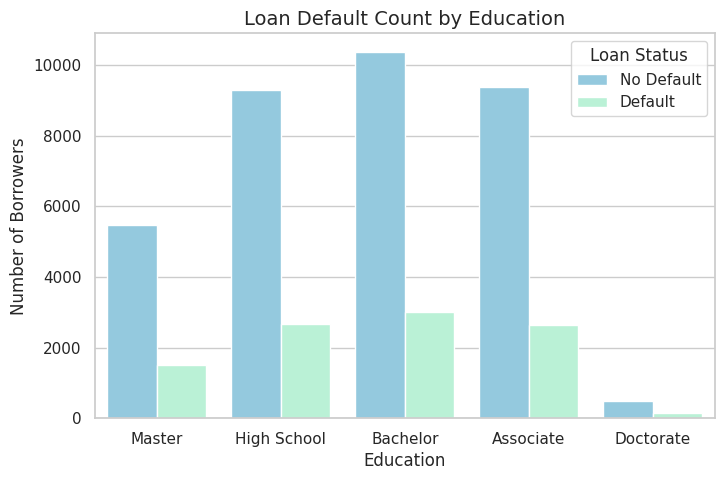

In [17]:
sns.set(style="whitegrid")

# Create the count plot for Education vs loan status
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="person_education", hue="loan_status", palette=('skyblue', '#B1FAD6', '#E8E3FF', '#FFCC99'))

# Add titles and labels
plt.title("Loan Default Count by Education", fontsize=14)
plt.xlabel("Education", fontsize=12)
plt.ylabel("Number of Borrowers", fontsize=12)
plt.legend(title="Loan Status", labels=["No Default", "Default"])

# Display the plot
plt.show()

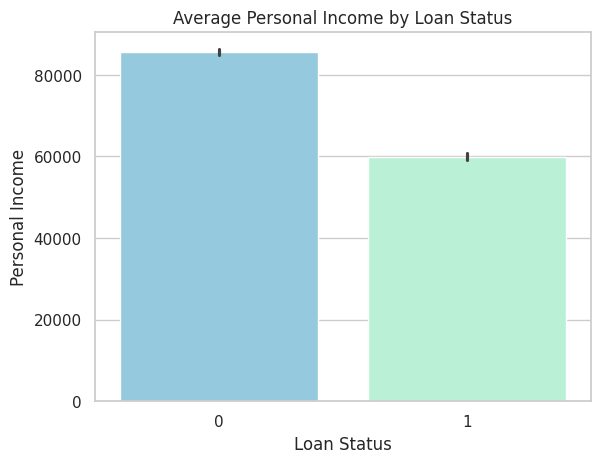

In [18]:
sns.barplot(x='loan_status', y='person_income', data=df, palette= ('skyblue', '#B1FAD6', '#E8E3FF', '#FFCC99'))
plt.title('Average Personal Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Personal Income')
plt.show()

##### **Loan default status in Education and income**

We created an income group from the person_income column and grouped it with oersonal information to see how loan default is distributed across the income group and if it has a correlation with education.

In [19]:
# Create income bins
df["income_group"] = pd.cut(df["person_income"], bins=[0, 50000, 100000, 150000, 200000, df["person_income"].max()],
                            labels=["Low", "Moderate", "Comfortable", "High", "Very High"])

# Group and count loan status by education and income group
edu_income_counts = df.groupby(["person_education", "income_group", "loan_status"]).size().unstack(fill_value=0).reset_index()


edu_income_counts.head()

loan_status,person_education,income_group,0,1
0,Associate,Low,2185,1337
1,Associate,Moderate,4786,1041
2,Associate,Comfortable,1617,189
3,Associate,High,483,48
4,Associate,Very High,304,35


<Figure size 1200x600 with 0 Axes>

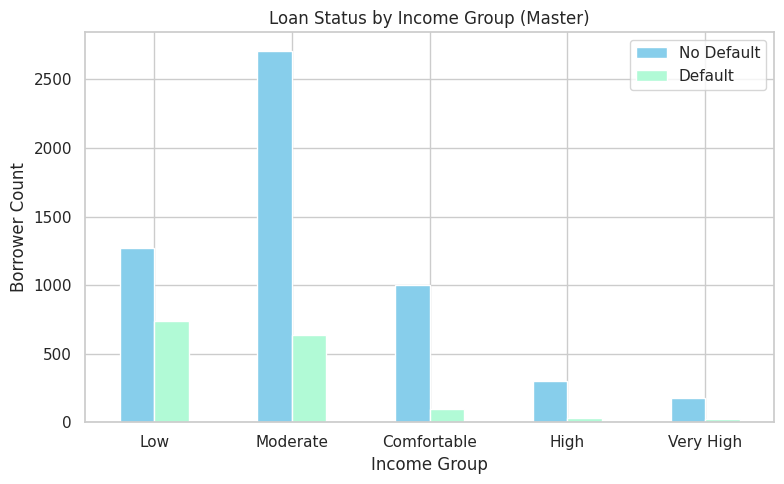

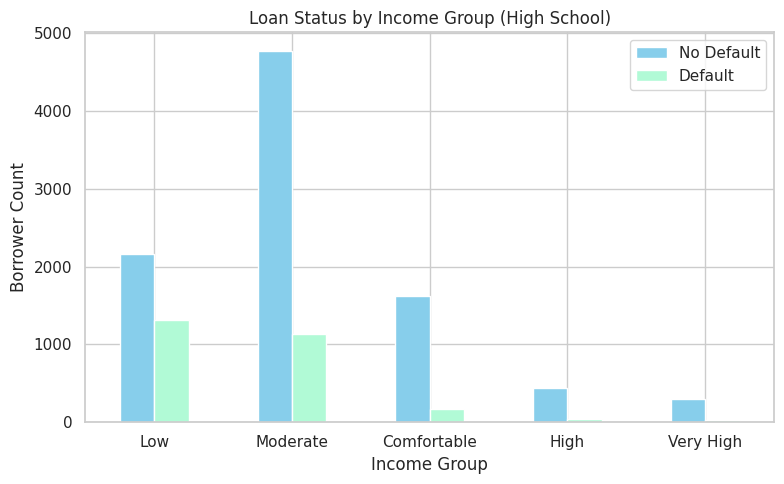

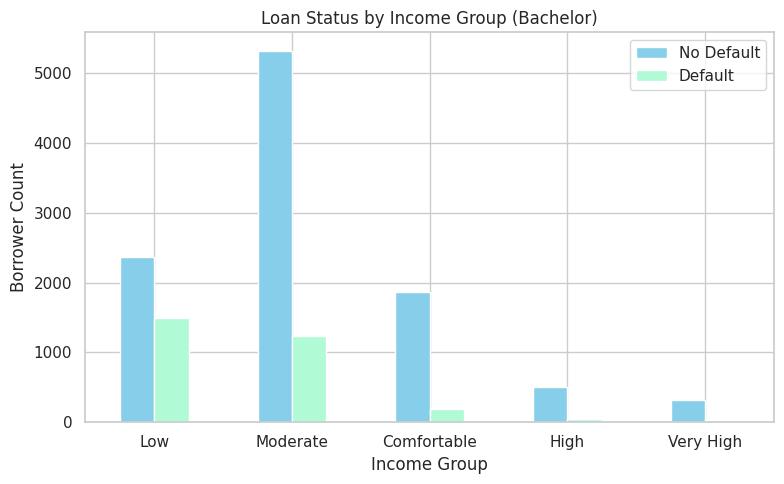

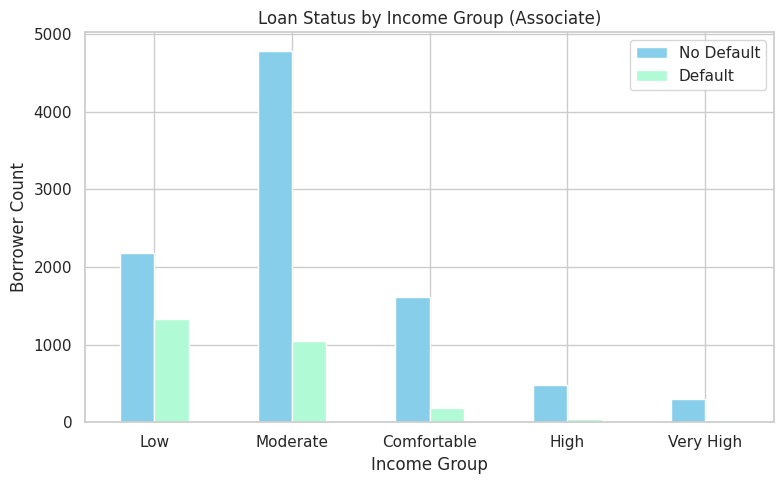

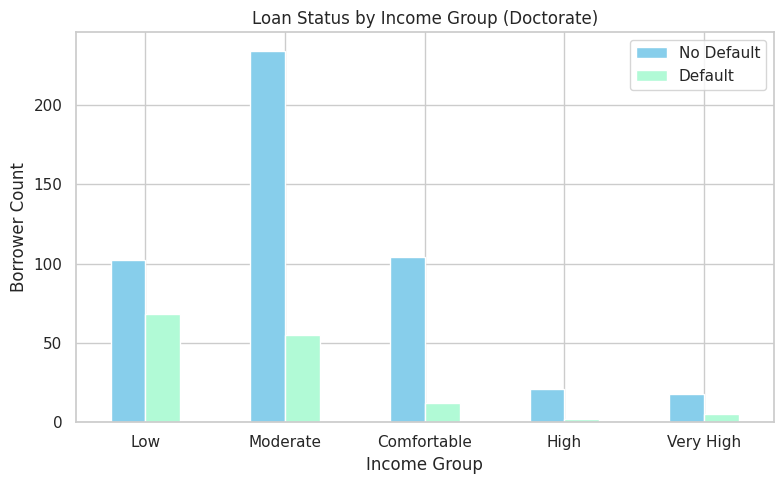

In [20]:


# Prepare data for plotting
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Plot each education-income group and the proportion of defaults
for education_level in df["person_education"].unique():
    subset = edu_income_counts[edu_income_counts["person_education"] == education_level]
    subset.set_index("income_group")[ [0, 1] ].plot(kind="bar", figsize=(8, 5),
        color=['skyblue', '#B1FAD6', '#E8E3FF', '#FFCC99'], title=f"Loan Status by Income Group ({education_level})")
    plt.ylabel("Borrower Count")
    plt.xlabel("Income Group")
    plt.xticks(rotation=0)
    plt.legend(["No Default", "Default"])
    plt.tight_layout()
    plt.show()

1. **Education Level: Master**
The Moderate income group has the highest number of borrowers. Default counts increase slightly in Low and Moderate income levels, very few defaults in the very High income group. Which suggests moderate earners with Master's degrees have more loans and some risk.

2. **Education Level: High School**
Borrower volume is highest in the Moderate income range, followed by Low.
Defaults are significant across all income groups, especially in Moderate.Indicates higher financial vulnerability despite lower education level.

3. **Education Level: Bachelor**
Again, the Moderate income group dominates in loan volume. Defaults are visible across income levels, though No Defaults are more frequent in higher income tiers. Bachelor degree holders seem better positioned than High School grads, with slightly improved default trends.

4. **Education Level: Associate**
Moderate income group has the highest number of borrowers and defaults. Low income group shows notable defaults too, indicating economic pressure. As income increases, default rates drop, especially in the High and Very High groups. This pattern suggests Associate degree holders with lower income may be more vulnerable to loan default.

5. **Education Level: Doctorate**
Borrower counts are significantly lower across all income groups—expected due to a smaller population. Again, the Moderate income group shows the highest activity and default count. Very High income holders with Doctorate degrees have minimal defaults, reinforcing the trend that income strongly buffers against default.




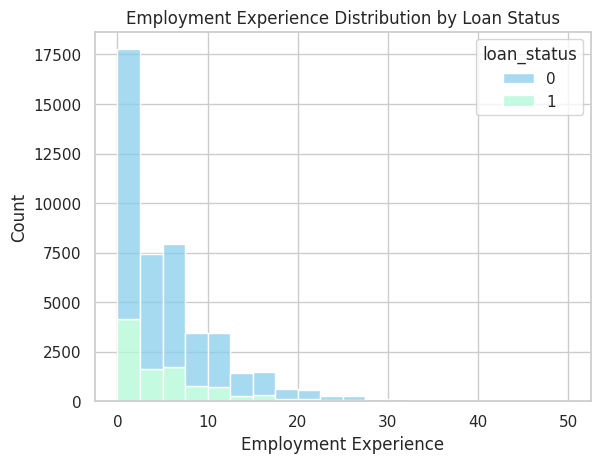

In [21]:
#employee experience

sns.histplot(data=df, x='person_emp_exp', hue='loan_status', multiple='stack', bins=20 , palette= ('skyblue', '#B1FAD6', '#E8E3FF', '#FFCC99'))
plt.title('Employment Experience Distribution by Loan Status')
plt.xlabel('Employment Experience')
plt.ylabel('Count')
plt.show()

Most borrowers have 0 to 15 years work experience, so naturally there is high activity and elevated risk within that range as default and non-default rise within this period. Very experienced workers tend not to default which indicates that greater financial capacity and cautious borrowing behaviour.

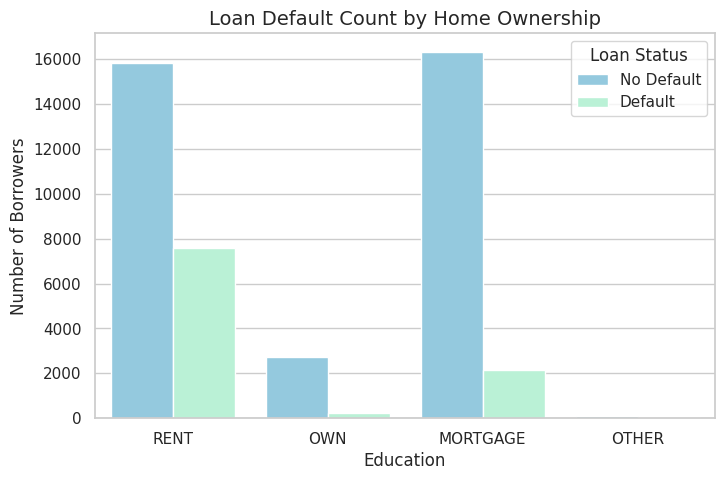

In [22]:
sns.set(style="whitegrid")

# Create the count plot for Home Ownership vs loan status
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="person_home_ownership", hue="loan_status", palette=('skyblue', '#B1FAD6', '#E8E3FF', '#FFCC99'))

# Add titles and labels
plt.title("Loan Default Count by Home Ownership", fontsize=14)
plt.xlabel("Education", fontsize=12)
plt.ylabel("Number of Borrowers", fontsize=12)
plt.legend(title="Loan Status", labels=["No Default", "Default"])

# Display the plot
plt.show()

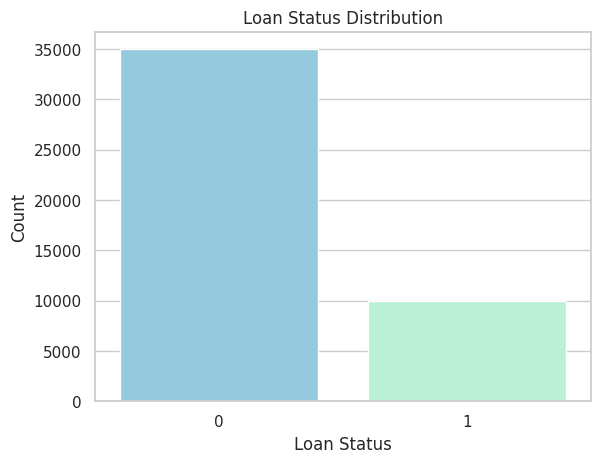

In [23]:
sns.countplot(data=df, x="loan_status", palette=('skyblue', '#B1FAD6', '#E8E3FF', '#FFCC99'))
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44988 entries, 0 to 44999
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   person_age                      44988 non-null  int64   
 1   person_gender                   44988 non-null  object  
 2   person_education                44988 non-null  object  
 3   person_income                   44988 non-null  float64 
 4   person_emp_exp                  44988 non-null  int64   
 5   person_home_ownership           44988 non-null  object  
 6   loan_amnt                       44988 non-null  float64 
 7   loan_intent                     44988 non-null  object  
 8   loan_int_rate                   44988 non-null  float64 
 9   loan_percent_income             44988 non-null  float64 
 10  cb_person_cred_hist_length      44988 non-null  float64 
 11  credit_score                    44988 non-null  int64   
 12  previous_loan_defaults_

In [25]:
df.columns.tolist()

['person_age',
 'person_gender',
 'person_education',
 'person_income',
 'person_emp_exp',
 'person_home_ownership',
 'loan_amnt',
 'loan_intent',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'previous_loan_defaults_on_file',
 'loan_status',
 'income_group']

#### **Feature Engineering**

In [26]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [27]:
#encode the columns

cat_columns = ['person_home_ownership',  'previous_loan_defaults_on_file', 'person_home_ownership', 'loan_intent', 'person_gender']

for column in cat_columns:
    df[column] = LabelEncoder().fit_transform(df[column])

df.head(3)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,income_group
0,22,0,Master,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1,Moderate
1,21,0,High School,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0,Low
2,25,0,High School,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1,Low


In [28]:
#ordinal encoding

# Define a logical order for education levels
education_order = {
    "High School": 1,
    "Associate": 2,
    "Bachelor": 3,
    "Master": 4,
    "Doctorate": 5
}

# Apply the mapping
df["person_education_encoded"] = df["person_education"].map(education_order)

# Preview the result
print(df[["person_education", "person_education_encoded"]].head())

  person_education  person_education_encoded
0           Master                         4
1      High School                         1
2      High School                         1
3         Bachelor                         3
4           Master                         4


In [29]:
df.drop(['person_education'], axis=1, inplace=True)

In [44]:
df['income_group'].unique()

array([3, 2, 0, 4, 1])

In [32]:
#ordinal encoding

# Define a logical order for income group
income_group_order = {
    "Low": 1,
    "Moderate": 2,
    "Comfortable": 3,
    "High": 4,
    "Very High:": 5
}

# Apply the mapping
df["income_group_encoded"] = df["income_group"].map(income_group_order)
df["income_group_encoded"] = df["income_group_encoded"].fillna(df["income_group_encoded"].median()).astype(int)

# Preview the result
print(df[["income_group", "income_group_encoded"]].head())

  income_group  income_group_encoded
0     Moderate                     2
1          Low                     1
2          Low                     1
3     Moderate                     2
4     Moderate                     2


In [33]:
df.head(3)

,person_age,person_gender,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,income_group,person_education_encoded,income_group_encoded
0,22,0,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1,Moderate,4,2
1,21,0,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0,Low,1,1
2,25,0,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1,Low,1,1


### **Splitting**

In [35]:
X=df.drop(['loan_status', 'income_group'],axis=1,inplace=False)
y=df['loan_status']

In [39]:
X.shape

(44988, 14)

In [40]:
#standardize the X variable before splitting
sc = StandardScaler()
X = sc.fit_transform(X)


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Model Building**

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

### 1**. Logistic Regression**

In [43]:
#logistic Regression
log_reg= LogisticRegression(max_iter=5000,random_state=33)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, random_state=33)

In [44]:
y_pred=log_reg.predict(X_test)

In [45]:
#import Evaluation modules
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

acc=round(accuracy_score(y_test, y_pred),2)
precision=round(precision_score(y_test,y_pred),3)
recall=round(recall_score(y_test,y_pred),2)
f1= round(f1_score(y_test,y_pred),2)
result= pd.DataFrame([['Logistic Regression',acc,precision,recall, f1]], columns= ['Model','Accuracy', 'Precision', 'Recall', 'F1_score'])

print(result)


                 Model  Accuracy  Precision  Recall  F1_score
0  Logistic Regression      0.89      0.771    0.74      0.76


<Axes: >

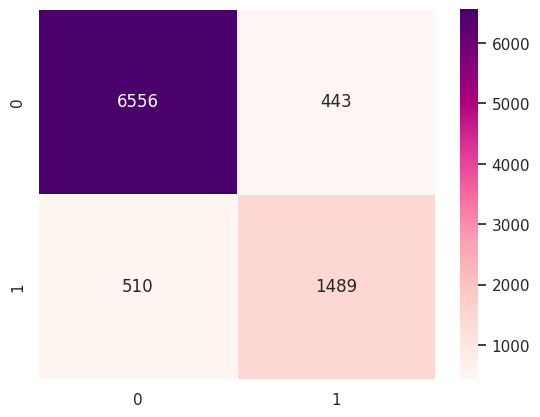

In [46]:
cm_dt= confusion_matrix(y_test, y_pred,labels=[0,1])
sns.heatmap(cm_dt,annot=True,linewidth=0.5,fmt=".0f",cmap='RdPu')

#### 2. **Decision Tree**

In [47]:
dt_clf = DecisionTreeClassifier(random_state=33, max_depth=5,criterion= 'gini', max_leaf_nodes= 13, min_samples_split= 2)
dt_clf.fit(X_train, y_train)
y_pred_dt=dt_clf.predict(X_test)

In [48]:
#Evaluation

acc=round(accuracy_score(y_test, y_pred_dt),2)
precision=round(precision_score(y_test,y_pred_dt),3)
recall=round(recall_score(y_test,y_pred_dt),2)
f1= round(f1_score(y_test,y_pred_dt),2)
Model_result= pd.DataFrame([['Decision Tree',acc,precision,recall, f1]], columns= ['Model','Accuracy', 'Precision', 'Recall', 'F1_score'])
result=pd.concat([result, Model_result],ignore_index=True)

print(result)


                 Model  Accuracy  Precision  Recall  F1_score
0  Logistic Regression      0.89      0.771    0.74      0.76
1        Decision Tree      0.91      0.883    0.71      0.79


<Axes: >

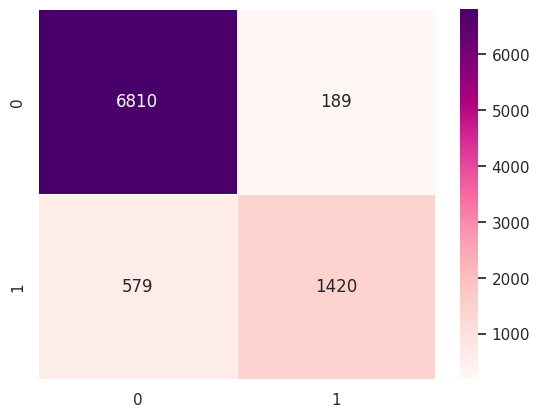

In [49]:
cm_dt= confusion_matrix(y_test, y_pred_dt,labels=[0,1])
sns.heatmap(cm_dt,annot=True,linewidth=0.5,fmt=".0f",cmap='RdPu')

#### **3. Random Forest**

In [50]:
RFC= RandomForestClassifier(n_estimators=8)
RFC.fit(X_train,y_train)
y_pred_rf=RFC.predict(X_test)

In [51]:
#Evaluation

acc=round(accuracy_score(y_test, y_pred_rf),2)
precision=round(precision_score(y_test,y_pred_rf),3)
recall=round(recall_score(y_test,y_pred_rf),2)
f1= round(f1_score(y_test,y_pred_rf),2)
Model_result= pd.DataFrame([['Random Forest',acc,precision,recall, f1]], columns= ['Model','Accuracy', 'Precision', 'Recall', 'F1_score'])
result=pd.concat([result, Model_result],ignore_index=True)

print(result)

                 Model  Accuracy  Precision  Recall  F1_score
0  Logistic Regression      0.89      0.771    0.74      0.76
1        Decision Tree      0.91      0.883    0.71      0.79
2        Random Forest      0.92      0.888    0.74      0.81


<Axes: >

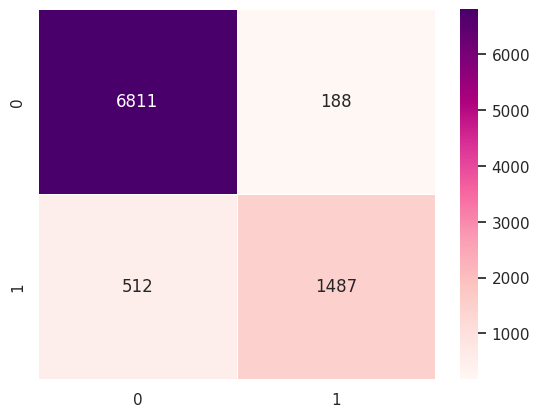

In [52]:
cm_dt= confusion_matrix(y_test, y_pred_rf,labels=[0,1])
sns.heatmap(cm_dt,annot=True,linewidth=0.5,fmt=".0f",cmap='RdPu')

####4. **XGBOOST**

In [53]:

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=33,learning_rate=0.01)

xgb.fit(X_train, y_train)

y_pred_xg=xgb.predict(X_test)

In [54]:
#Evaluation

acc=round(accuracy_score(y_test, y_pred_xg),2)
precision=round(precision_score(y_test,y_pred_rf),3)
recall=round(recall_score(y_test,y_pred_xg),2)
f1= round(f1_score(y_test,y_pred_xg),2)
Model_result= pd.DataFrame([['Xgboost',acc,precision,recall, f1]], columns= ['Model','Accuracy', 'Precision', 'Recall', 'F1_score'])
result=pd.concat([result, Model_result],ignore_index=True)

print(result)

                 Model  Accuracy  Precision  Recall  F1_score
0  Logistic Regression      0.89      0.771    0.74      0.76
1        Decision Tree      0.91      0.883    0.71      0.79
2        Random Forest      0.92      0.888    0.74      0.81
3              Xgboost      0.91      0.888    0.67      0.78


<Axes: >

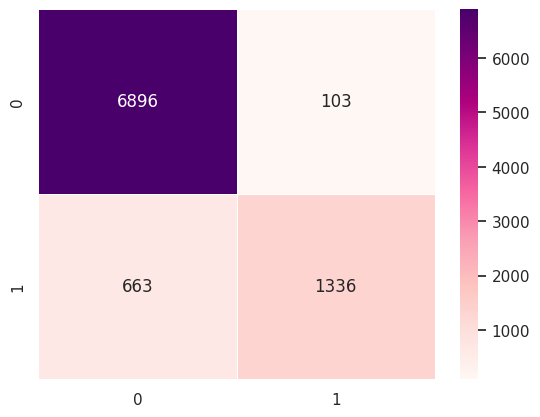

In [55]:
cm_dt= confusion_matrix(y_test, y_pred_xg,labels=[0,1])
sns.heatmap(cm_dt,annot=True,linewidth=0.5,fmt=".0f",cmap='RdPu')

#### 5. **SVC**

In [56]:
svc= SVC(kernel="rbf", C=1, gamma="auto", random_state=42)
svc.fit(X_train, y_train)
y_pred_svc=svc.predict(X_test)

In [57]:
#Evaluation

acc=round(accuracy_score(y_test, y_pred_svc),2)
precision=round(precision_score(y_test,y_pred_svc),3)
recall=round(recall_score(y_test,y_pred_svc),2)
f1= round(f1_score(y_test,y_pred_svc),2)
Model_result= pd.DataFrame([['SVC',acc,precision,recall, f1]], columns= ['Model','Accuracy', 'Precision', 'Recall', 'F1_score'])
result=pd.concat([result, Model_result],ignore_index=True)

print(result)

                 Model  Accuracy  Precision  Recall  F1_score
0  Logistic Regression      0.89      0.771    0.74      0.76
1        Decision Tree      0.91      0.883    0.71      0.79
2        Random Forest      0.92      0.888    0.74      0.81
3              Xgboost      0.91      0.888    0.67      0.78
4                  SVC      0.91      0.831    0.75      0.79


<Axes: >

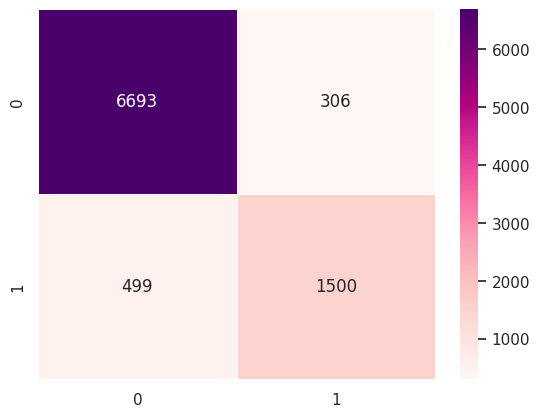

In [58]:
cm_dt= confusion_matrix(y_test, y_pred_svc,labels=[0,1])
sns.heatmap(cm_dt,annot=True,linewidth=0.5,fmt=".0f",cmap='RdPu')

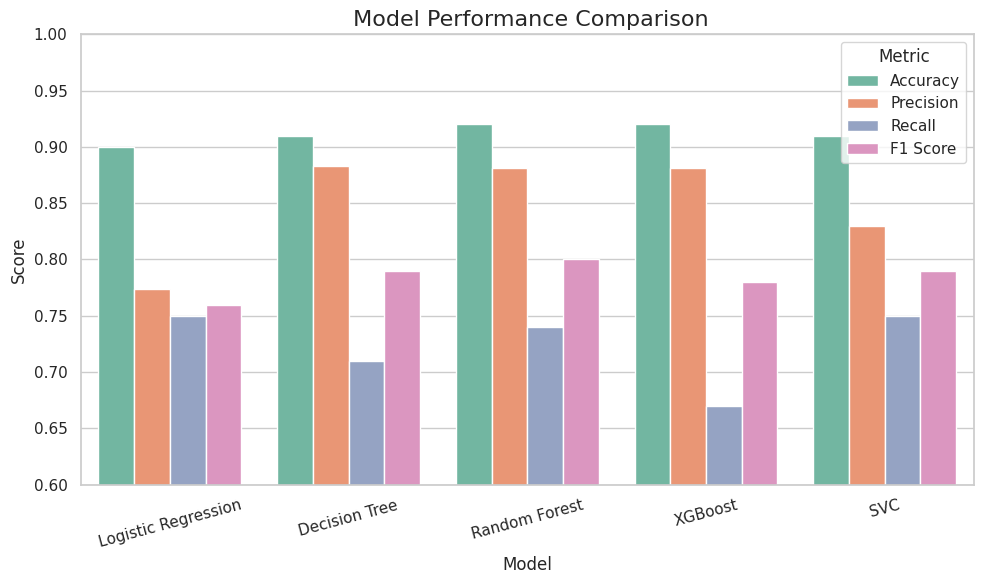

In [59]:

# Recreate the results
data = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost", "SVC"],
    "Accuracy": [0.90, 0.91, 0.92, 0.92, 0.91],
    "Precision": [0.774, 0.883, 0.881, 0.881, 0.830],
    "Recall": [0.75, 0.71, 0.74, 0.67, 0.75],
    "F1 Score": [0.76, 0.79, 0.80, 0.78, 0.79]
}

# Convert to DataFrame
df_models = pd.DataFrame(data)

# Melt for plotting
df_melted = df_models.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Plot with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric", palette="Set2")

# Add title and style
plt.title(" Model Performance Comparison", fontsize=16)
plt.xticks(rotation=15)
plt.ylabel("Score")
plt.ylim(0.6, 1.0)
plt.legend(title="Metric", loc="upper right")
plt.tight_layout()
plt.show()

# **USING BALANCED DATASET**

In [60]:
from imblearn.over_sampling import SMOTE

# Ensure X_train is a NumPy array
X_train = np.array(X_train)
# Ensure y_train is a NumPy array and contains integers (0 and 1)
y_train = np.array(y_train).astype(int)

sm=SMOTE(random_state=33,sampling_strategy='minority')
X_train_new, y_train_new = sm.fit_resample(X_train, y_train)


from collections import Counter
print("Original:", Counter(y_train))
print("Balanced:", Counter(y_train_new))

Original: Counter({np.int64(0): 27989, np.int64(1): 8001})
Balanced: Counter({np.int64(1): 27989, np.int64(0): 27989})


In [61]:
RFC= RandomForestClassifier(n_estimators=8)
RFC.fit(X_train_new,y_train_new)
y_pred_bal=RFC.predict(X_test)

In [62]:
#import Evaluation modules
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

acc=round(accuracy_score(y_test, y_pred_bal),2)
precision=round(precision_score(y_test,y_pred_bal),3)
recall=round(recall_score(y_test,y_pred_bal),2)
f1= round(f1_score(y_test,y_pred_bal),2)
result= pd.DataFrame([['Random forest Balanced',acc,precision,recall, f1]], columns= ['Model','Accuracy', 'Precision', 'Recall', 'F1_score'])

print(result)

                    Model  Accuracy  Precision  Recall  F1_score
0  Random forest Balanced      0.91       0.81     0.8      0.81


<Axes: >

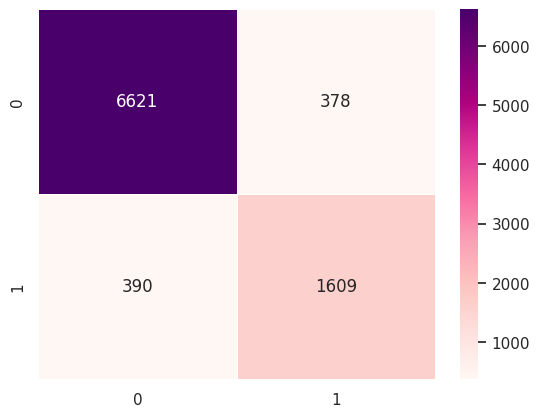

In [63]:
cm_dt= confusion_matrix(y_test, y_pred_bal,labels=[0,1])
sns.heatmap(cm_dt,annot=True,linewidth=0.5,fmt=".0f",cmap='RdPu')

#### **RANDOM FOREST OPTIMIZATION**

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

grid_search = GridSearchCV(estimator=RFC, param_grid=param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train_new, y_train_new)

#Best parameter

best_rf = grid_search.best_estimator_
y_pred_opt = best_rf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 216 candidates, totalling 648 fits


KeyboardInterrupt: 

In [68]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import numpy as np


#Define Hyperparameter Grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 300, 50),  # Number of trees: 50 to 250
    'max_depth': [None] + list(np.arange(10, 31, 5)),  # Max depth: None or 10 to 30
    'min_samples_split': np.arange(2, 11, 2),  # Min samples to split: 2 to 10
    'min_samples_leaf': np.arange(1, 5, 1),  # Min samples in leaf: 1 to 4
    'max_features': ['sqrt', 'log2']  # Max features to consider
}

# 12. RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42), # Pass the estimator here
    param_distributions=param_dist,
    n_iter=20,  # Number of parameter settings to sample
    cv=5,  # 5-fold cross-validation
    scoring='f1',  # Optimize for F1-score due to imbalanced data
    n_jobs=-1,  # Use all available cores
    random_state=42,
    verbose=1
)

# 13. Fit RandomizedSearchCV
random_search.fit(X_train_new, y_train_new)

# 14. Best Model
best_rf_model = random_search.best_estimator_
y_pred_opt = best_rf_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': np.int64(100), 'min_samples_split': np.int64(2), 'min_samples_leaf': np.int64(1), 'max_features': 'log2', 'max_depth': None}


In [74]:
RFC_opt= RandomForestClassifier(**{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None})
RFC_opt.fit(X_train_new,y_train_new)
y_pred_optimized=RFC_opt.predict(X_test)

In [75]:
#import Evaluation modules
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

acc=round(accuracy_score(y_test, y_pred_optimized),2)
precision=round(precision_score(y_test,y_pred_optimized),3)
recall=round(recall_score(y_test,y_pred_optimized),2)
f1= round(f1_score(y_test,y_pred_optimized),2)
result= pd.DataFrame([['Random forest Balanced',acc,precision,recall, f1]], columns= ['Model','Accuracy', 'Precision', 'Recall', 'F1_score'])

print(result)

                    Model  Accuracy  Precision  Recall  F1_score
0  Random forest Balanced      0.92      0.813    0.85      0.83


<Axes: >

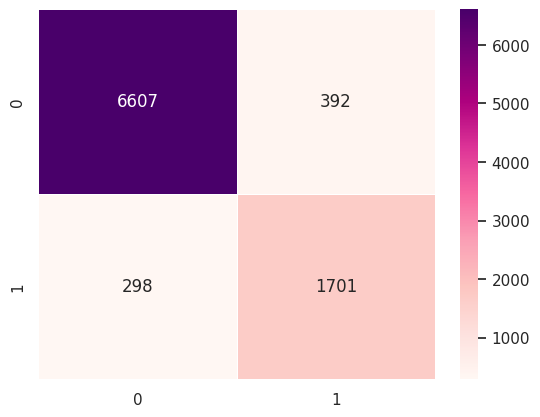

In [76]:
cm_dt= confusion_matrix(y_test, y_pred_optimized,labels=[0,1])
sns.heatmap(cm_dt,annot=True,linewidth=0.5,fmt=".0f",cmap='RdPu')